# 2021 Tokyo Olympics

### importing the required python modules and libraries

In [ ]:
!pip install geopandas
!pip install plotly
!pip install --upgrade plotly

     |████████████████████████████████| 1.0 MB 14.0 MB/s 
     |████████████████████████████████| 6.3 MB 42.4 MB/s 
     |████████████████████████████████| 15.4 MB 38.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### reading data from the files

In [ ]:
df_athletes = pd.read_excel("/content/drive/MyDrive/Data/DV_Project/Athletes.xlsx")
df_coaches = pd.read_excel("/content/drive/MyDrive/Data/DV_Project/Coaches.xlsx")
df_gender = pd.read_excel("/content/drive/MyDrive/Data/DV_Project/EntriesGender.xlsx")
df_medals = pd.read_excel("/content/drive/MyDrive/Data/DV_Project/Medals.xlsx")
df_teams = pd.read_excel("/content/drive/MyDrive/Data/DV_Project/Teams.xlsx")
warnings.simplefilter("ignore") #openpyxl warning

# Looking into Athletes dataset

### getting the first five rows of the dataset

In [ ]:
df_athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


### stats of the dataset

In [ ]:
df_athletes.describe()  

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,KOPECKY Lotte,United States of America,Athletics
freq,2,615,2068


### shape of the dataset

In [ ]:
df_athletes.shape

(11085, 3)

### finding null values and filling if any

In [ ]:
df_athletes.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

## Number of total participants by countries

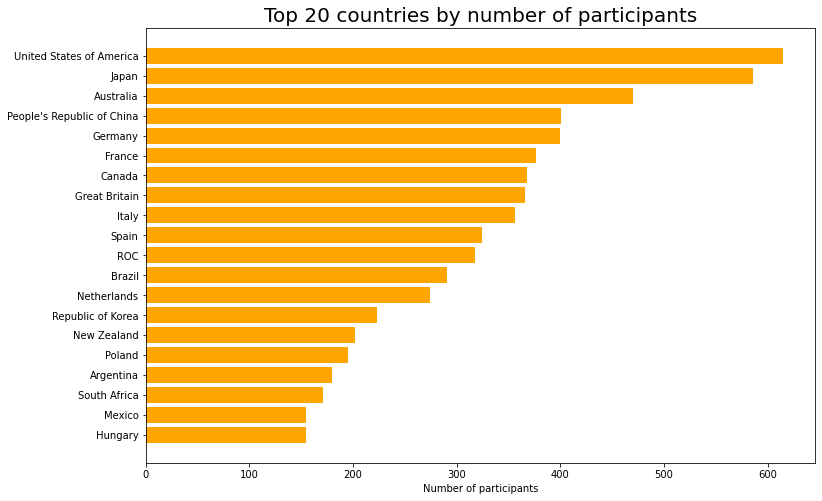

In [ ]:
NOC_country = df_athletes["NOC"].value_counts()
NOC_country = NOC_country.sort_values().tail(20)
fig, ax = plt.subplots(figsize = (12,8))
ax.barh(NOC_country.index, NOC_country.values, color = "orange")
ax.set_xlabel("Number of participants")
plt.title("Top 20 countries by number of participants", fontsize = 20)
plt.show()

## Game discipline


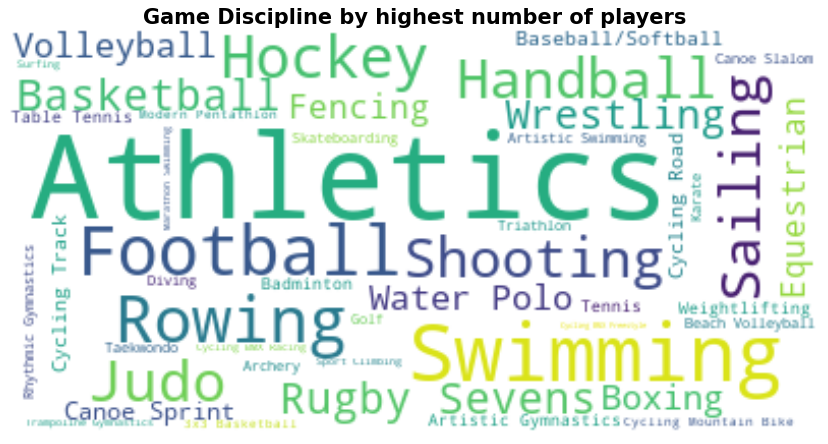

In [ ]:
discipline = (df_athletes["Discipline"].value_counts()).to_dict()
d_wordcloud = WordCloud(background_color="white").generate_from_frequencies(discipline)
plt.figure(figsize=(14,12), dpi=75)
plt.imshow(d_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Game Discipline by highest number of players", fontsize = 20, fontweight = "bold")
plt.show()

## Players by Countries


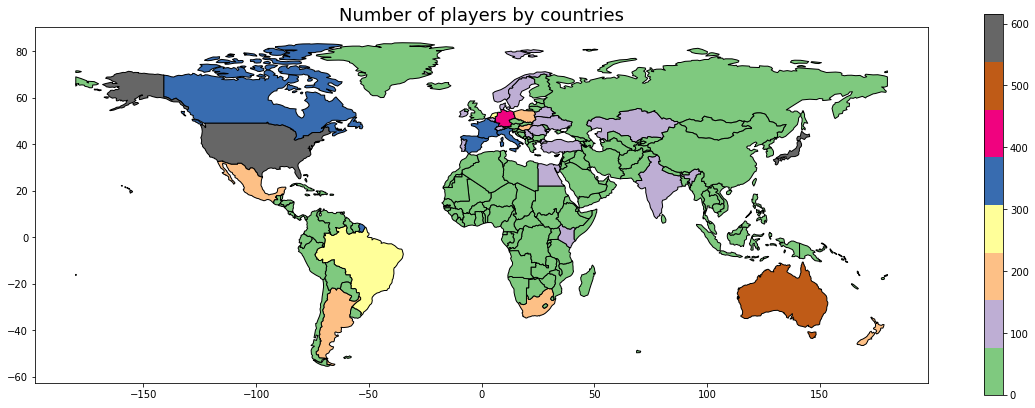

In [ ]:
pl_data=df_athletes["NOC"].value_counts()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]
world['players']=0
for i,j in pl_data.items():
    world.loc[world.name==i,'players']=j
    
fig, ax = plt.subplots(figsize=(20,7))

world.plot(column='players',ax=ax,legend=True,cmap='Accent',edgecolor="black")
plt.title("Number of players by countries", fontsize=18)
plt.show()


# Looking into Coaches dataset

### getting the first five rows of the dataset

In [ ]:
df_coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


### stats of the dataset

In [ ]:
df_coaches.describe()

,Name,NOC,Discipline,Event
count,394,394,394,249
unique,381,61,9,6
top,GUERRERO Rolando,Japan,Basketball,Men
freq,2,35,74,94


### shape of the dataset

In [ ]:
df_coaches.shape

(394, 4)

### finding null values and filling if any

In [ ]:
df_coaches.isnull().sum()

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

In [ ]:
df_coaches = df_coaches.fillna(value = 0)

In [ ]:
df_coaches.isnull().sum()

Name          0
NOC           0
Discipline    0
Event         0
dtype: int64

## Countries by number of coaches

In [ ]:
c = df_coaches.NOC.value_counts()
px.bar(c[:30], title = 'Top 30 Countries by number of coaches')

# Looking into Entries Gender dataset

### getting the first five rows of the dataset

In [ ]:
df_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


### stats of the dataset 

In [ ]:
df_gender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


### shape of dataset

In [ ]:
df_gender.shape

(46, 4)

### finding null values and filling if any

In [ ]:
df_gender.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

## Overall Male - Female participant percentage

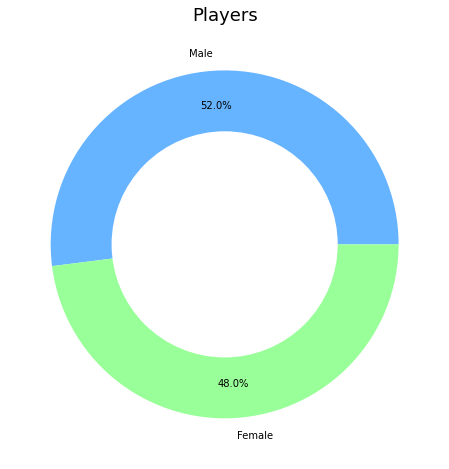

In [ ]:
m = df_gender['Male'].sum()
f = df_gender['Female'].sum()
label = ['Male', 'Female']
color = ['#66b3ff','#99ff99']
d = [m,f]

plt.figure(figsize=(8,8))
plt.pie(d, autopct='%1.1f%%',colors=color, labels=label, pctdistance=0.80)

#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig=plt.gcf() #get current figure handle
fig.gca().add_artist(centre_circle) #get current figure axis

plt.title("Players", fontsize=18)
plt.show()

## Female count in each discipline

In [ ]:
fig = px.bar(df_gender, 
             x = 'Discipline', 
             y = 'Total', 
             color='Female', 
             animation_frame='Total', 
             animation_group='Discipline',
             title='Count of Female participants')
fig.show()

# Looking into Medals dataset

### getting the first five rows of the dataset

In [ ]:
df_medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


### stats of the dataset 

In [ ]:
df_medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


### shape of the dataset 

In [ ]:
df_medals.shape

(93, 7)

### finding null values and filling if any

In [ ]:
df_medals.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

## Overall medal distribution

In [ ]:
fig = px.pie(df_medals.head(45),
             values = 'Total',
             names = 'Team/NOC',
             title = 'Medal distribution')

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

In [ ]:
fig = px.pie(df_medals.tail(48),
             values = 'Total',
             names = 'Team/NOC',
             title = 'Medal distribution')

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

## Countries by number of medals

In [ ]:
medals = df_medals.head(20)
fig = px.bar(medals, x='Team/NOC',y=['Gold','Silver','Bronze'], title='Top 20 Countries by number of medals')
fig.show()

## Top 10 countries to win Gold medal

Text(0.5, 1.0, 'Top 10 countries with count of gold medals')

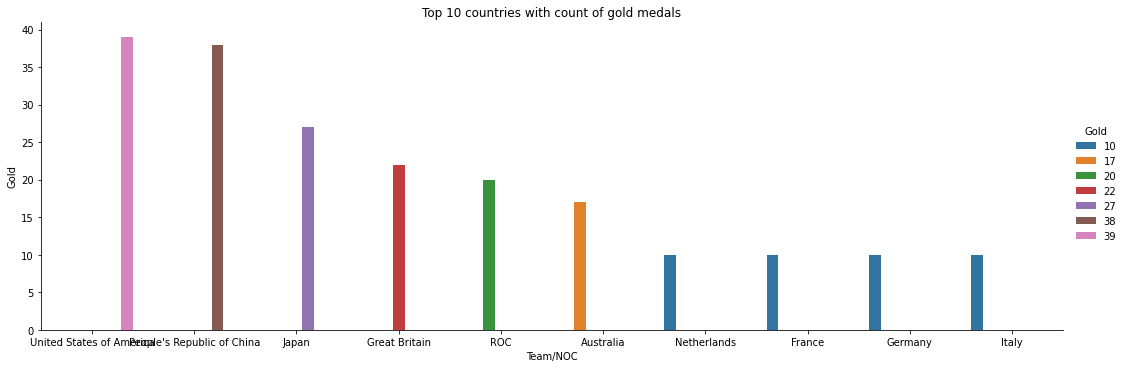

In [ ]:
sns.catplot(data = df_medals.head(10), 
            kind = 'bar', 
            x = 'Team/NOC', 
            y = 'Gold', 
            hue='Gold',
            height = 5,
            aspect = 3)
plt.title('Top 10 countries with count of gold medals')

# Looking into Teams dataset

### getting the first five rows of the dataset

In [ ]:
df_teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### stats of the dataset

In [ ]:
df_teams.describe()

,Name,Discipline,NOC,Event
count,743,743,743,743
unique,146,20,84,36
top,Japan,Swimming,Japan,Men
freq,45,113,48,120


### shape of the dataset

In [ ]:
df_teams.shape

(743, 4)

### finding null values and filling if any

In [ ]:
df_teams.isnull().sum()

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

## Hierarchial representation of Teams

In [ ]:
fig = px.sunburst(df_teams,
                  path = ['Name','Discipline','Event'],
                  title = 'Hierarchial representation of Teams')
fig.show()

## Number of teams for each Country

In [ ]:
x= df_teams.NOC.value_counts()
px.bar(x[:], color_discrete_sequence=["skyblue"], title="Number of teams for each Country")


# Conclusion

### **Athletes**:

From our analysis we can say that United States of America, Japan, Australia, China, Germany are the top 5 countries with most number of participants.

Athletics has the most number of players i.e 2068, followed by swimming with 743 participants and football with 567 participants.


---


### **Coaches:**

We can depict that Japan has the highest number of coaches i.e 25, followed by Spain and United States of America with 28 coaches and Australia with 22 coaches.


---


### **Gender:**

We can say that male participants are more than female participants.

The overall male percentage is 52 and female percentage is 48.


---


### **Medals:**

From the plots we can say that, United States of America has secured highest number of medals i.e 113, followed by China with 88 medals and ROC with 71 medals. 

The top contries with gold medal are United States of America, China, Japan, Great Britain and ROC.


---


### **Teams:**

From our analysis we can see that Japan has the highest number of teams played in 2021 Tokyo Olympics. There were totally 48 teams from Japan, 47 teams from United States of America, 37 teams from Italy and followed by Germany with 36 teams and Australia with 35 teams.